# I - Setup initial

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [88]:
# Import et aperçu des datasets
df_2024_Table = pd.read_excel("DataForTable2.1.xls")
df_continents = pd.read_csv("continents2.csv")

display(df_2024_Table.head())
display(df_continents.head())

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008     3.723590            7.350416        0.450662   
1  Afghanistan  2009     4.401778            7.508646        0.552308   
2  Afghanistan  2010     4.758381            7.613900        0.539075   
3  Afghanistan  2011     3.831719            7.581259        0.521104   
4  Afghanistan  2012     3.782938            7.660506        0.520637   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                         50.500000                      0.718114    0.164055   
1                         50.799999                      0.678896    0.187297   
2                         51.099998                      0.600127    0.117861   
3                         51.400002                      0.495901    0.160098   
4                         51.700001                      0.530935    0.234157   

   Perceptions of corruption  Positive affect  Negative affect  
0                   0.881686         0.414297         0.258195  
1                   0.850035         0.481421         0.237092  
2                   0.706766         0.516907         0.275324  
3                   0.731109         0.479835         0.267175  
4                   0.775620         0.613513         0.267919

name alpha-2 alpha-3  country-code     iso_3166-2   region  \
0     Afghanistan      AF     AFG             4  ISO 3166-2:AF     Asia   
1   Åland Islands      AX     ALA           248  ISO 3166-2:AX   Europe   
2         Albania      AL     ALB             8  ISO 3166-2:AL   Europe   
3         Algeria      DZ     DZA            12  ISO 3166-2:DZ   Africa   
4  American Samoa      AS     ASM            16  ISO 3166-2:AS  Oceania   

        sub-region intermediate-region  region-code  sub-region-code  \
0    Southern Asia                 NaN        142.0             34.0   
1  Northern Europe                 NaN        150.0            154.0   
2  Southern Europe                 NaN        150.0             39.0   
3  Northern Africa                 NaN          2.0             15.0   
4        Polynesia                 NaN          9.0             61.0   

   intermediate-region-code  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN

# II - Nettoyage des données

In [89]:
# Correspondance des noms de pays
df_2024_Table['Country name'] = df_2024_Table['Country name'].replace({'Türkiye':'Turkey',
                                                                       'Taiwan Province of China':'Taiwan',
                                                                       'Hong Kong S.A.R. of China':'Hong Kong'
                                                                       })

df_continents['name'] = df_continents['name'].replace({'Bosnia And Herzegovina':'Bosnia and Herzegovina',
                                                       'Congo (Democratic Republic Of The)':'Congo (Brazzaville)',
                                                       'Congo':'Congo (Kinshasa)',
                                                       "Côte D'Ivoire":'Ivory Coast',
                                                       'Czech Republic':'Czechia',
                                                       'Macedonia':'North Macedonia',
                                                       'Palestine, State of':'State of Palestine'
                                                       })

# Merge des 2 datasets
df_2024 = pd.merge(df_2024_Table, df_continents[['name', 'region','sub-region']], left_on = "Country name", right_on = "name", how = 'left')

# Drop colonne "name"
df_2024.drop(columns='name', inplace=True)

# Ordre et casse des colonnes
df_2024 = df_2024[['Country name', 'region', 'sub-region'] + [col for col in df_2024.columns if col not in ['Country name', 'region', 'sub-region']]]

df_2024 = df_2024.rename(columns={'region': 'Region', 'sub-region': 'Sub region', 'year': 'Year'})

# Ajout données Kosovo
df_2024.loc[df_2024['Country name'] == 'Kosovo', ['Region', 'Sub region']] = ['Europe', 'Southern Europe']

# Conservation des 10 dernières années 
df_2024 = df_2024.drop(df_2024[df_2024.Year < 2014].index)

In [90]:
df_2024.isna().sum()

Country name                         0
Region                               0
Sub region                           0
Year                                 0
Life Ladder                          0
Log GDP per capita                  22
Social support                       5
Healthy life expectancy at birth    35
Freedom to make life choices        20
Generosity                          30
Perceptions of corruption           77
Positive affect                     10
Negative affect                      9
dtype: int64

# III - Visualisation

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
# import plotly_express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import plotly.graph_objs as go
%matplotlib inline

In [92]:
display(df_2024_Table.head())
display(df_continents.head())

df_2024.to_csv("df_2024_modifie.csv", index=False)

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008     3.723590            7.350416        0.450662   
1  Afghanistan  2009     4.401778            7.508646        0.552308   
2  Afghanistan  2010     4.758381            7.613900        0.539075   
3  Afghanistan  2011     3.831719            7.581259        0.521104   
4  Afghanistan  2012     3.782938            7.660506        0.520637   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                         50.500000                      0.718114    0.164055   
1                         50.799999                      0.678896    0.187297   
2                         51.099998                      0.600127    0.117861   
3                         51.400002                      0.495901    0.160098   
4                         51.700001                      0.530935    0.234157   

   Perceptions of corruption  Positive affect  Negative affect  
0                   0.881686         0.414297         0.258195  
1                   0.850035         0.481421         0.237092  
2                   0.706766         0.516907         0.275324  
3                   0.731109         0.479835         0.267175  
4                   0.775620         0.613513         0.267919

name alpha-2 alpha-3  country-code     iso_3166-2   region  \
0     Afghanistan      AF     AFG             4  ISO 3166-2:AF     Asia   
1   Åland Islands      AX     ALA           248  ISO 3166-2:AX   Europe   
2         Albania      AL     ALB             8  ISO 3166-2:AL   Europe   
3         Algeria      DZ     DZA            12  ISO 3166-2:DZ   Africa   
4  American Samoa      AS     ASM            16  ISO 3166-2:AS  Oceania   

        sub-region intermediate-region  region-code  sub-region-code  \
0    Southern Asia                 NaN        142.0             34.0   
1  Northern Europe                 NaN        150.0            154.0   
2  Southern Europe                 NaN        150.0             39.0   
3  Northern Africa                 NaN          2.0             15.0   
4        Polynesia                 NaN          9.0             61.0   

   intermediate-region-code  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN

In [93]:
import warnings
warnings.filterwarnings('ignore')

#### 1 - Pairplot

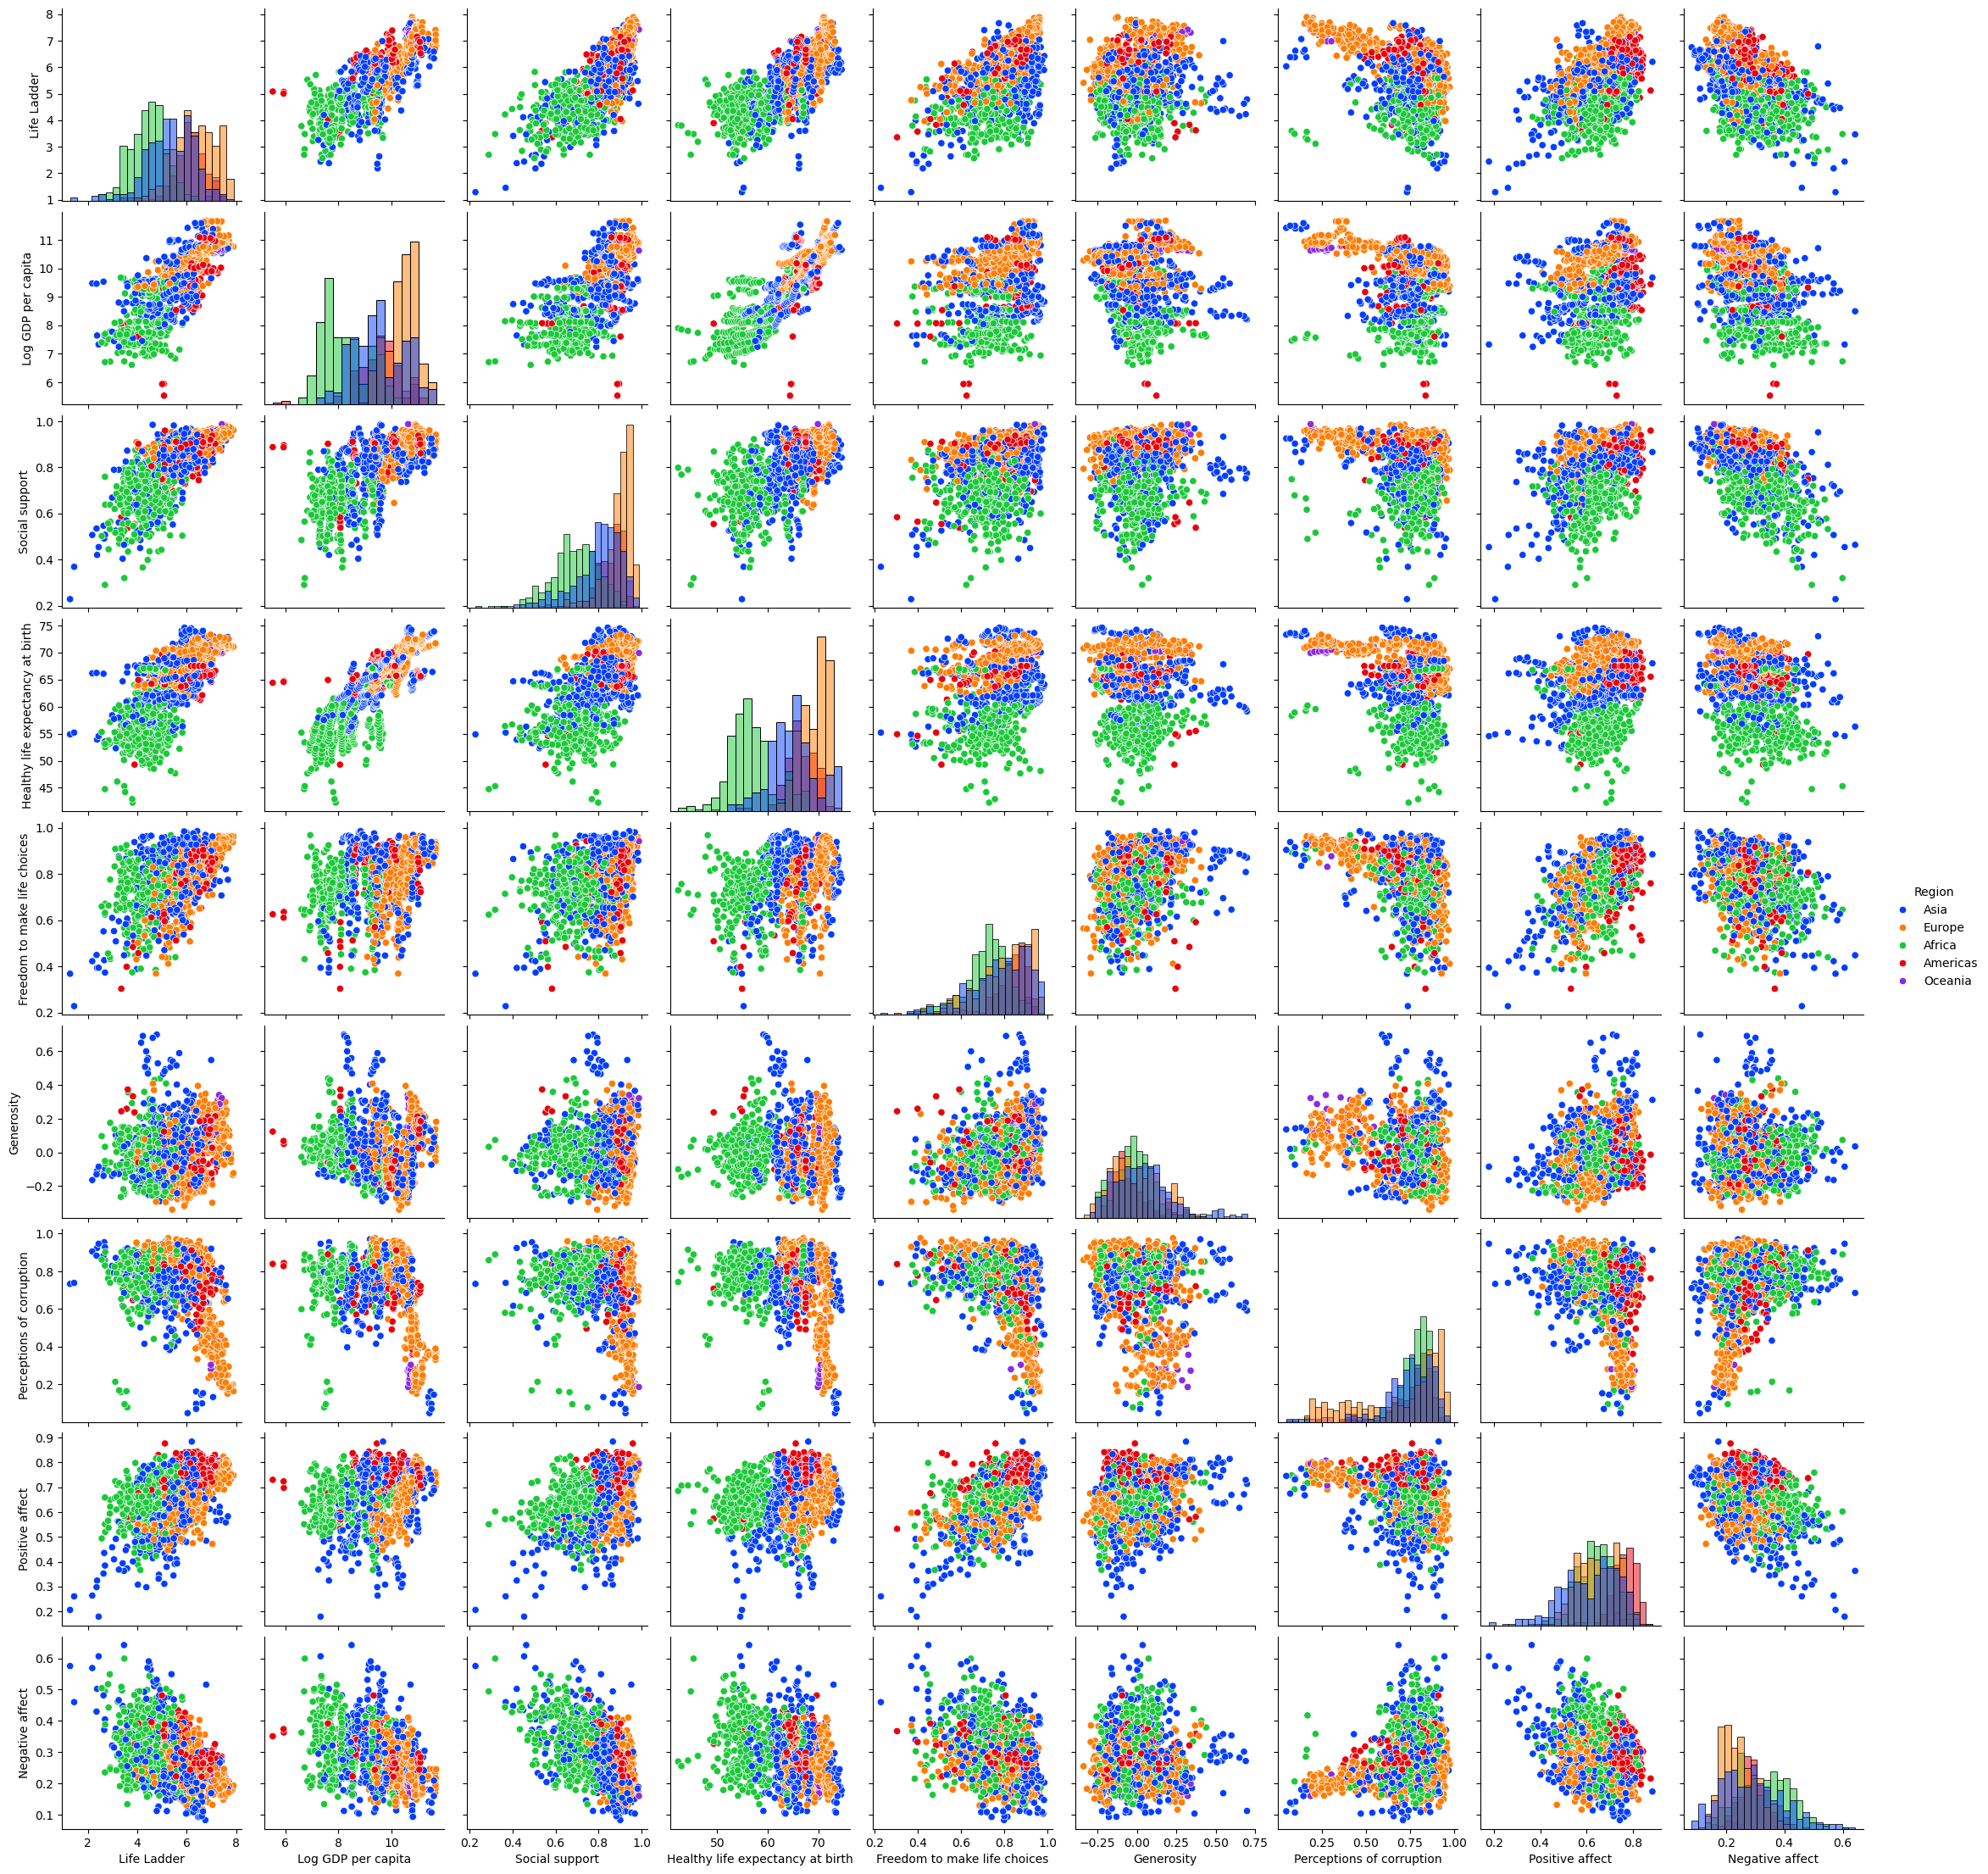

In [94]:
sns.pairplot(data = df_2024.drop(columns = 'Year'), diag_kind = 'hist', hue = 'Region', palette ='bright')

#### 2 - Heatmap

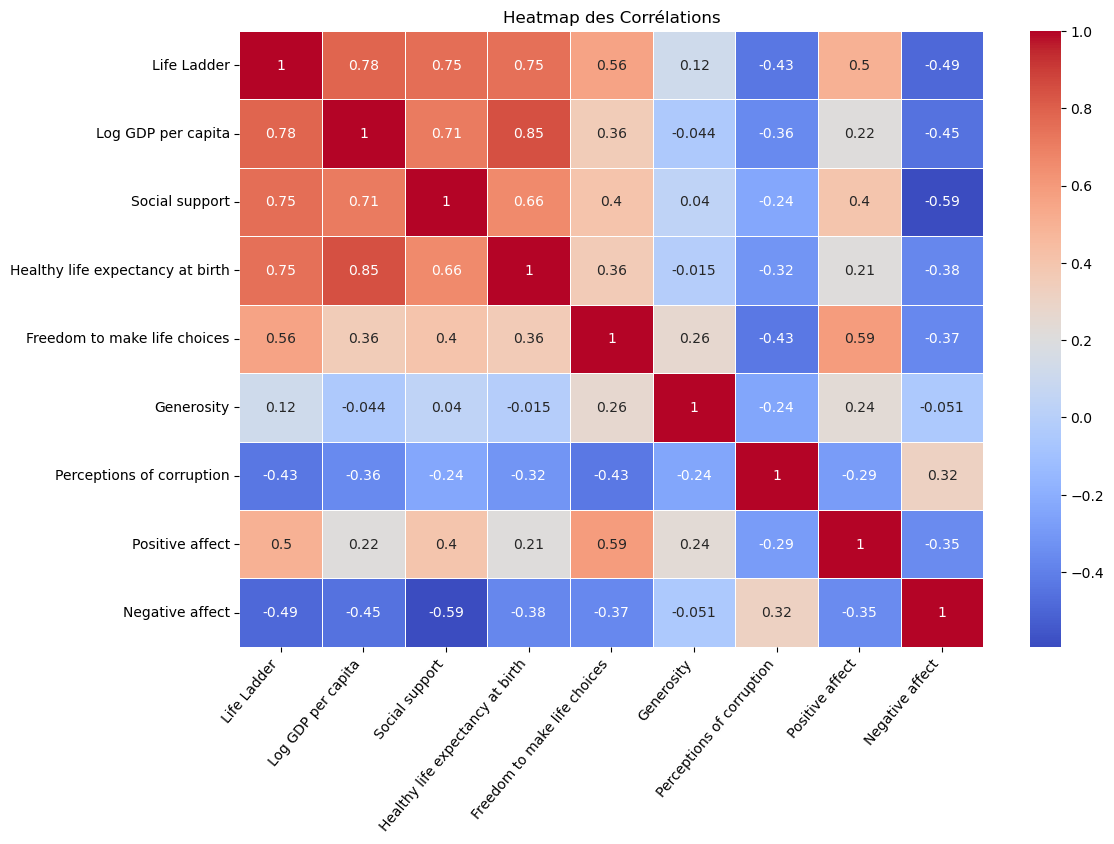

In [95]:
def conv_float(colonne):
    if df_2024[colonne].dtype == 'object':
        df_2024[colonne] = df_2024[colonne].str.replace(',', '.').astype(float)

colonnes_a_convertir = ['Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth',
                        'Freedom to make life choices', 'Generosity','Perceptions of corruption', 'Positive affect', 'Negative affect']


for colonne in colonnes_a_convertir:
    conv_float(colonne)


corr = df_2024[colonnes_a_convertir].corr()


plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.xticks(rotation=50,ha='right')
plt.title('Heatmap des Corrélations')
plt.show()

________________________________

#### 3 - Carte choroplèthe

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go

In [97]:
# On crée une carte avec des filtres pour les sous-région
fig = px.choropleth(df_2024,
                    locations='Country name',
                    locationmode='country names',
                    color='Life Ladder',
                    hover_name='Country name',
                    color_continuous_scale=px.colors.sequential.Magma,
                    title='Score de 2024 de Life Ladder par pays',
                    animation_frame='Sub region', # Ajout de l'animation pour les sous-régions
                    animation_group='Country name', # Ajout du groupe d'animation
                    )

# On ajoute les filtres pour les sous-régions via Plotly Dash
fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="LightGray")

# On affiche la carte
fig.show()

#### 4 - Graphique de dispersion

In [98]:
# Création du graphique de dispersion
fig = px.scatter(df_2024, 
                 x='Log GDP per capita', 
                 y='Life Ladder', 
                 color='Country name',
                 title='Relation entre le Log PIB par habitant et la Satisfaction de vie',
                 labels={'Log GDP per capita': 'Log PIB par habitant', 'Life Ladder': 'Satisfaction de vie'},
                 hover_data=['Country name'])

# Afficher le graphique
fig.show()

In [99]:
# On crée un nuage de points pour explorer les relations potentielles
fig = px.scatter(df_2024, x='Log GDP per capita', y='Life Ladder', color='Region',
                 title='Relation entre le Log PIB par habitant et Life Ladder',
                 labels={'Log GDP per capita': 'Log PIB par habitant', 'Life Ladder': 'Satisfaction de vie'},
                 hover_name='Country name')

# On affiche le graphique
fig.show()

#### 5 - Courbes

In [100]:
# Calculer la moyenne pour 'Freedom_to_make_life_choices' pour chaque pays
df_grouped = df_2024.groupby('Country name').agg({
    'Freedom to make life choices': 'mean'
}).reset_index()

# Trier et sélectionner les top 5 pays
df_top5 = df_grouped.sort_values(by='Freedom to make life choices', ascending=False).head(5)

# Filtrer les données originales pour les top 5 pays
df_top5_countries = df_2024[df_2024['Country name'].isin(df_top5['Country name'])]

# Transformer le DataFrame en format long pour Plotly
df_long = df_top5_countries.melt(id_vars=['Country name', 'Year'],
                                  value_vars=['Freedom to make life choices', 'Generosity', 'Perceptions of corruption'],
                                  var_name='Indicator',
                                  value_name='Value')

# Créer le graphique
fig = px.line(df_long, x='Year', y='Value', color='Indicator',
              facet_col='Country name', facet_col_wrap=2,
              title='Top 5 Countries Based on Freedom to Make Life Choices')

fig.show()

#### 6 - Histogramme

In [101]:
#Conversion des colonnes numériques en float
cols_to_convert = ['Life Ladder', 'Log GDP per capita', 'Social support', 
                   'Healthy life expectancy at birth', 'Freedom to make life choices', 
                   'Generosity', 'Perceptions of corruption']

df_2024[cols_to_convert] = df_2024[cols_to_convert].astype(float)

# Vérification des colonnes
print("Colonnes disponibles dans df_2024:", df_2024.columns)

# Calculer les moyennes par région, en ignorant les colonnes non numériques
df_mean = df_2024.groupby('Region')[cols_to_convert].mean().reset_index()

# Vérification des colonnes après la transformation
print("Colonnes disponibles dans df_2024:", df_mean.columns)

# Transformation des données pour une visualisation avec plotly.express
df_long = df_mean.melt(id_vars=['Region'], 
                       value_vars=cols_to_convert,
                       var_name='Variable', 
                       value_name='Value')

# Créer un graphique en barres empilées pour comparer les valeurs moyennes
fig = px.bar(df_long, x='Region', y='Value', color='Variable', barmode='group',
             title='Comparaison des valeurs moyennes par région',
             labels={'Value': 'Valeur moyenne', 'Variable': 'Facteur'})

# Afficher le graphique
fig.show()

Colonnes disponibles dans df_2024: Index(['Country name', 'Region', 'Sub region', 'Year', 'Life Ladder',
       'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect'],
      dtype='object')
Colonnes disponibles dans df_2024: Index(['Region', 'Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption'],
      dtype='object')


#### 7 - Life ladder moyen 10 ans par continent

In [102]:
df_period = df_2024[(df_2024['Year'] >= 2014) & (df_2024['Year'] <= 2023)]


# Calculer la moyenne du "Ladder score" par région et par année
average_happiness = df_period.groupby(['Year', 'Region', 'Sub region'])['Life Ladder'].mean().reset_index()

# Vérifier les premières lignes pour s'assurer que les moyennes sont calculées correctement
print(average_happiness.head(50))

    Year    Region                       Sub region  Life Ladder
0   2014    Africa                  Northern Africa     5.035560
1   2014    Africa               Sub-Saharan Africa     4.084551
2   2014  Americas  Latin America and the Caribbean     6.060082
3   2014  Americas                 Northern America     7.227686
4   2014      Asia                     Central Asia     5.591008
5   2014      Asia                     Eastern Asia     5.594325
6   2014      Asia               South-eastern Asia     5.584394
7   2014      Asia                    Southern Asia     4.561281
8   2014      Asia                     Western Asia     5.437371
9   2014    Europe                   Eastern Europe     5.578255
10  2014    Europe                  Northern Europe     6.751455
11  2014    Europe                  Southern Europe     5.426137
12  2014    Europe                   Western Europe     6.994504
13  2014   Oceania        Australia and New Zealand     7.297221
14  2015    Africa       

In [103]:
average_happiness_continent= df_period.groupby(['Year', 'Region'])['Life Ladder'].mean().reset_index()

# création du graphique
fig = px.line(average_happiness_continent, 
              x='Year', 
              y='Life Ladder', 
              color='Region',
              title='Évolution du bonheur dans le monde par continent (10 dernières années)',
              labels={'Life Ladder': 'Score de bonheur', 'Year': 'Année'})

fig.update_layout(xaxis_title='Année',
                  yaxis_title='Score de bonheur',
                  height=600)

fig.show()

# IV - Modélisation

### 1 - Préprocessing

##### Import des packages

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error
import statsmodels.api as sm

##### Préparation des données

In [105]:
# Drop des colonnes  Country name, Region et Sub region
df = df_2024.drop(['Year', 'Country name'], axis = 1)

In [106]:
# Séparation en deux dataframe

feats = df.drop('Life Ladder', axis=1)
target = df['Life Ladder']


# Séparation en données d'entrainement et de test

X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size=0.2, random_state = 42)

#	One-Hot Encoding sur données entrainement

OHE = OneHotEncoder(drop='first', sparse_output=False)  
X_train_encoded = OHE.fit_transform(X_train[['Region', 'Sub region']])
X_test_encoded = OHE.transform(X_test[['Region', 'Sub region']])

# convertir encodages en df
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=OHE.get_feature_names_out(['Region', 'Sub region']))
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=OHE.get_feature_names_out(['Region', 'Sub region']))

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

# Concaténer les df encodés 
X_train_full = pd.concat([X_train.drop(['Region', 'Sub region'], axis=1), X_train_encoded_df], axis=1)
X_test_full = pd.concat([X_test.drop(['Region', 'Sub region'], axis=1), X_test_encoded_df], axis=1)

# Gestion valeurs manquantes

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
X_train_full_imputed = imputer.fit_transform(X_train_full)
X_test_full_imputed = imputer.transform(X_test_full)

all_columns = X_train_full.columns


X_train = pd.DataFrame(X_train_full_imputed, columns=all_columns)
X_test = pd.DataFrame(X_test_full_imputed, columns=all_columns)

print(X_train.head())
print(X_test.head())


   Log GDP per capita  Social support  Healthy life expectancy at birth  \
0            9.380879        0.816925                         63.049999   
1            9.576818        0.870970                         68.824997   
2           10.067001        0.933471                         67.500000   
3            8.883399        0.707336                         59.900002   
4           10.057425        0.863067                         65.720001   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                      0.884856    0.540485                   0.845080   
1                      0.850766   -0.154003                   0.854821   
2                      0.902679   -0.107435                   0.599400   
3                      0.891001    0.068111                   0.591617   
4                      0.808384    0.235280                   0.844815   

   Positive affect  Negative affect  Region_Americas  Region_Asia  ...  \
0         0.798547         0.2

In [107]:
df.isna().sum()
df.isna().any(axis=1).sum()
display(X_train.shape)
display(X_test.shape)

(1099, 25)

(275, 25)

### 2 - Linear regression

In [108]:
# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Vérification de la présence de NaN
print(np.isnan(X_train_scaled).sum())
print(np.isnan(X_test_scaled).sum())  

0
0


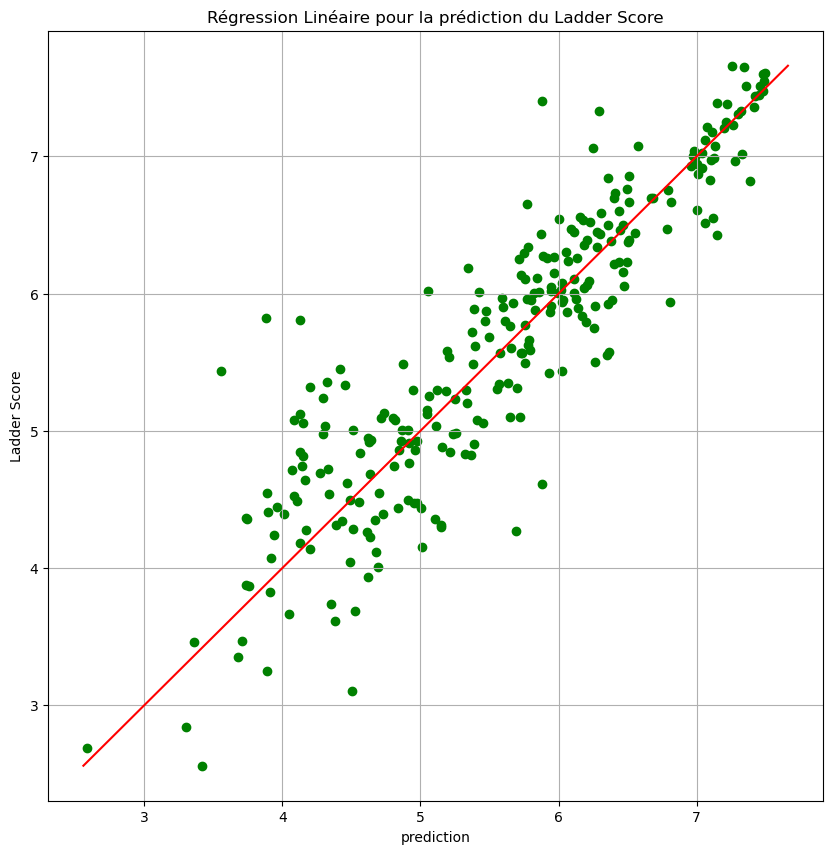

In [109]:
# initialisation et fit du modèle Linear Regressor
lr = LinearRegression()

lr.fit(X_train, y_train)

# visualisation

fig = plt.figure(figsize = (10,10))
pred_test = lr.predict(X_test)
plt.scatter(pred_test, y_test, c='green')

plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), color = 'red')
plt.xlabel("prediction")
plt.ylabel("Ladder Score")
plt.grid()
plt.title('Régression Linéaire pour la prédiction du Ladder Score');

In [110]:
print(lr.intercept_)

print(lr.coef_[0])

-2.2642964169273956
0.2445512104204601


In [111]:
# Prédictions
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Scores d'entraînement et de test
train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)
print(f"Training Score (R²): {train_score}")
print(f"Test Score (R²): {test_score}")

# Calcul des autres métriques
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")

Training Score (R²): 0.8065468591668532
Test Score (R²): 0.8007739249638459
Mean Absolute Error: 0.34864299407474614
Mean Squared Error: 0.22811832219307984
Root Mean Squared Error: 0.4776173386646258
R² Score: 0.8007739249638459


In [112]:
X_train_df = pd.DataFrame(X_train, columns=feats.columns)

feature_importance = pd.DataFrame(np.abs(lr.coef_), index=X_train_df.columns, columns=['importance']).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance.index, feature_importance['importance'])
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance pour la Linear Regression')
plt.gca().invert_yaxis() 

for index, value in enumerate(feature_importance['importance']):
    plt.text(value, index, f'{value:.2f}')

plt.show()

ValueError: Shape of passed values is (25, 1), indices imply (10, 1)

### 3 - Random Forest

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

0.9851720706757119
0.8903054362195033


RANDOM FOREST
Mean Absolute Error: 0.26 : erreur moyenne absolue en unités réelles de la variable cible
Mean Squared Error: 0.13 :  moyenne des carrés des erreurs entre les valeurs prédites et les valeurs réelles.
R² Score: 0.89 : indique à quel point le modèle explique la variance des données 
Mean Absolute Percentage Error (MAPE): 5.16%: affiche l'erreur en % relatif aux valeurs réelles 


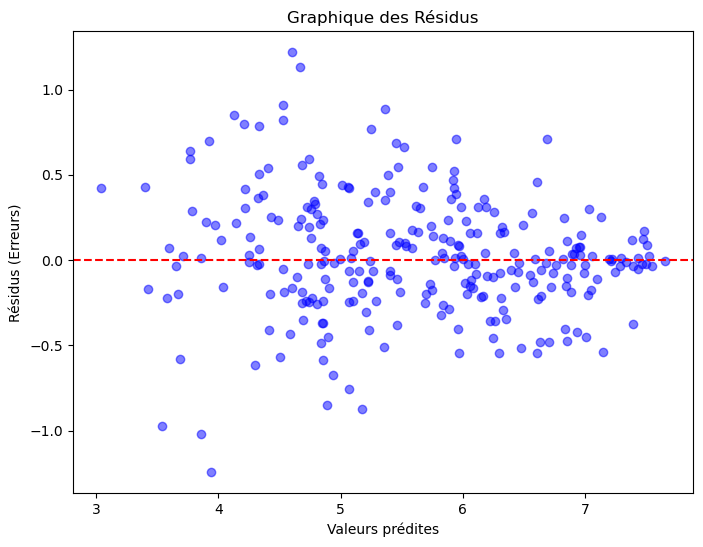

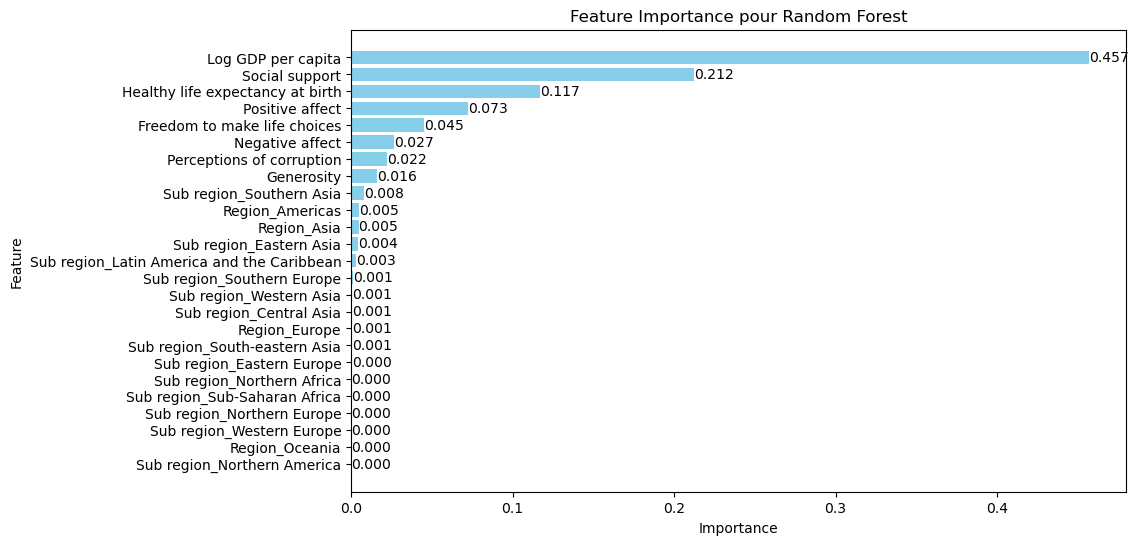

In [ ]:
# Prédictions
y_pred = rf.predict(X_test)

# Évaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
dw_stat = sm.stats.stattools.durbin_watson(y_test - y_pred)

print("RANDOM FOREST")
print(f"Mean Absolute Error: {mae:.2f}", ": erreur moyenne absolue en unités réelles de la variable cible")
print(f"Mean Squared Error: {mse:.2f}", ":  moyenne des carrés des erreurs entre les valeurs prédites et les valeurs réelles.")
print(f"R² Score: {r2:.2f}", ": indique à quel point le modèle explique la variance des données ")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2%}" ": affiche l'erreur en % relatif aux valeurs réelles ")


# Graphique des résidus
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_test - y_pred, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valeurs prédites')
plt.ylabel('Résidus (Erreurs)')
plt.title('Graphique des Résidus')
plt.show()

#Feature importance
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
for index, value in enumerate(feature_importance_df['Importance']):
    plt.text(value, index, f'{value:.3f}', va='center')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance pour Random Forest')
plt.gca().invert_yaxis()  # Inverser l'axe Y pour avoir les caractéristiques les plus importantes en haut
plt.show()

### 4 - XG Boost 

#### Optimisation, Prédictions, Feature Importance

In [115]:
%pip install xgboost
import xgboost as xgb

Note: you may need to restart the kernel to use updated packages.


In [116]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=list(X_train.columns))
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=list(X_test.columns))

#Paramètres optimisés (hyper-paramètrage)

params =  {
    'objective': 'reg:squarederror',
    'max_depth': 7,  
    'learning_rate': 0.1, 
    'subsample': 0.9,
    'colsample_bytree': 0.7,  
    'gamma': 0.2, 
    'reg_alpha': 3.0,  
    'reg_lambda': 7.0,  
    'min_child_weight': 3,  
    'seed': 42
}
num_boost_round = 150  
model = xgb.train(params, dtrain, num_boost_round)

y_pred = model.predict(dtest)

XGBOOST
Mean Absolute Error: 0.29 : erreur moyenne absolue en unités réelles de la variable cible
Mean Squared Error: 0.15 : moyenne des carrés des erreurs entre les valeurs prédites et les valeurs réelles.
Root Mean Squared Error: 0.39 : écart-type des résidus
R² Score: 0.87 : indique à quel point le modèle explique la variance des données 
Mean Absolute Percentage Error (MAPE): 5.74%: affiche l'erreur en % relatif aux valeurs réelles 


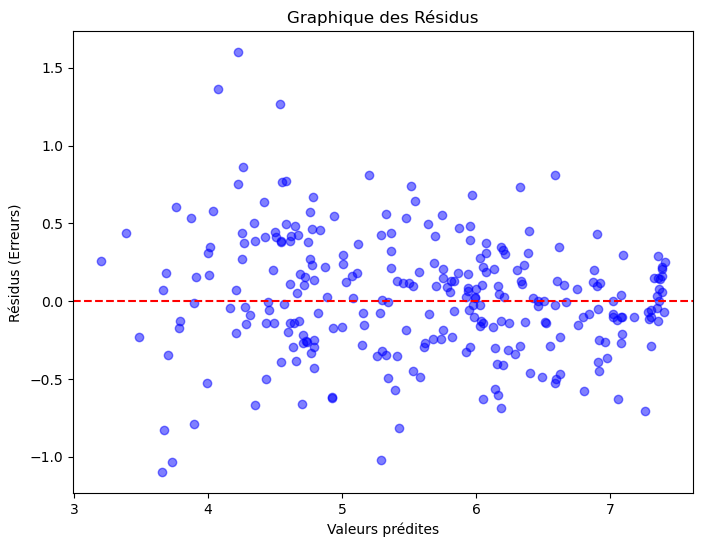

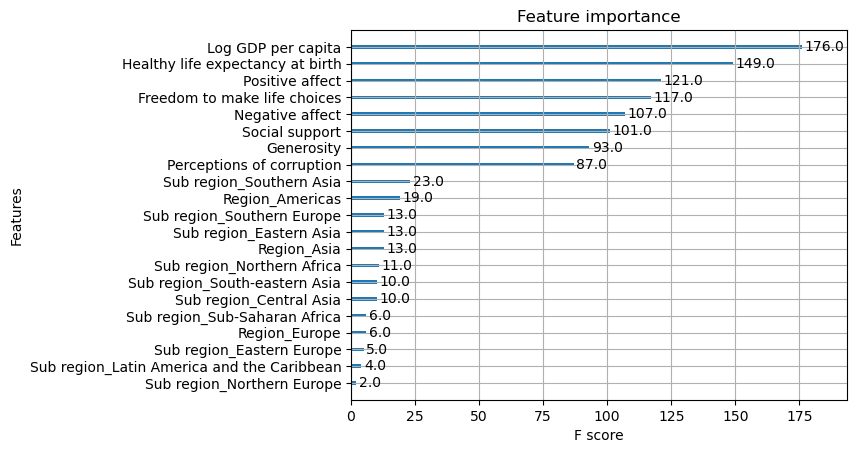

0.3852569616751797


In [117]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
dw_stat = sm.stats.stattools.durbin_watson(y_test - y_pred) 

print("XGBOOST")
print(f"Mean Absolute Error: {mae:.2f}", ": erreur moyenne absolue en unités réelles de la variable cible")
print(f"Mean Squared Error: {mse:.2f}", ": moyenne des carrés des erreurs entre les valeurs prédites et les valeurs réelles.")
print(f"Root Mean Squared Error: {rmse:.2f}", ": écart-type des résidus")
print(f"R² Score: {r2:.2f}", ": indique à quel point le modèle explique la variance des données ")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2%}" ": affiche l'erreur en % relatif aux valeurs réelles ")

# Graphique des résidus
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_test - y_pred, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valeurs prédites')
plt.ylabel('Résidus (Erreurs)')
plt.title('Graphique des Résidus')
plt.show()

#Feature importance
y_pred = model.predict(dtest)
xgb.plot_importance(model)

print(rmse)

#### Méthode pour Hyper paramètrage

In [ ]:
from sklearn.model_selection import GridSearchCV

# Conversion de DMatrix en format compatible avec GridSearchCV (XGBRegrssor)
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', seed=42)

# Hyper-paramètres test
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 150, 200],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 3, 5]
}

# Instanciation de gridSearchCV avec le modèle, les paramètres et la méthode de validation croisée
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)

#Recherche des meilleurs paramètres 
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres et le meilleur score
print(f"Meilleurs paramètres : {grid_search.best_params_}")
print(f"Best score found: {grid_search.best_score_}")

Fitting 3 folds for each of 2187 candidates, totalling 6561 fits
Meilleurs paramètres : {'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
Best score found: -0.1452894904589871


#### Méthode de validation Croisée

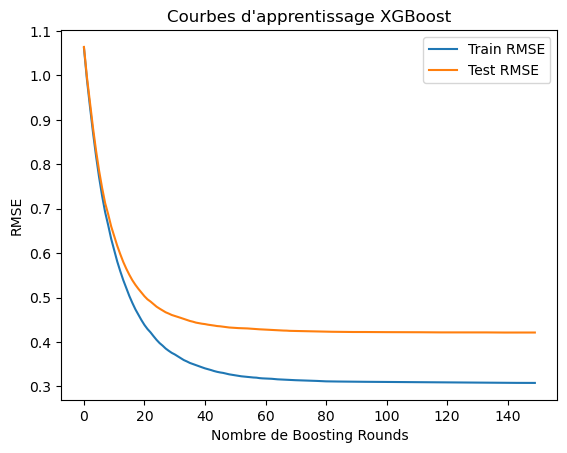

Last Train RMSE: 0.31, Last Test RMSE: 0.42


In [ ]:
# Validation croisée
cv_results = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=150, 
    nfold=10,
    metrics='rmse',
    as_pandas=True,
    seed=42,
    early_stopping_rounds=20,
    verbose_eval=False
)

# Courbe d'apprentissage
plt.plot(cv_results['train-rmse-mean'], label='Train RMSE')
plt.plot(cv_results['test-rmse-mean'], label='Test RMSE')
plt.xlabel('Nombre de Boosting Rounds')
plt.ylabel('RMSE')
plt.title('Courbes d\'apprentissage XGBoost')
plt.legend()
plt.show()


# Vérification overfitting
train_rmse_last = cv_results['train-rmse-mean'].values[-1]
test_rmse_last = cv_results['test-rmse-mean'].values[-1]
print(f"Last Train RMSE: {train_rmse_last:.2f}, Last Test RMSE: {test_rmse_last:.2f}")